# Introduction 

* The dataset has mall customers calculate the spending score with features where given in below.
* The data has no label and it is avalaible for clustering. 
* We will cluster the datas with Kmeans algorithms(Unsupervised method).

# Features 

* CustomerID
* Gender 
* Age 
* Annual Income 
* Spending score 


# Content

* Trying to understand data 
* Encoding feature that has a object type
* Feature engineering 
  * Analysis correlation values.
  * Avarage to anual income by gender.
  * Avarage to spending score by gender.
  * Relation with age and spending score.
    * General
    * By gender
  * Relation with age and Anual incomes
    * General
    * By gender 
  * Relation with Anual incomes and Spending score 
    * General 
    * By gender
* Dropping to 3 feature for clustering and visualization
* Clustering time!
  * Specify k number with elbow method.
  * Clustering with kmeans algorithms
  * Visualization Clusters and centroids.

## Importing libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Trying to understand data

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
# give a information from data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# some statics values from data 
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# control the null elements from data 
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# first five elements in data 
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Encoding feature that has a object type

In [12]:
# encoding gender feature with label encoder
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data.iloc[:,1] = le.fit_transform(data.iloc[:,1])
# male represent with 1 and female represent with 0

## Feature engineering

### Analysis correlation values.

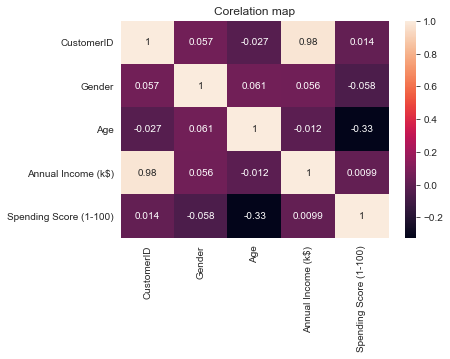

In [15]:
sns.heatmap(data.corr() , annot = True)
plt.title('Corelation map')
plt.show()

* As we can see customerID and Annual Income has the best corelation score 0.98 ıt's that mean the features has strong relation between values.

## Avarage to anual income by gender.

In [16]:
# calculate the anual income mean by gender 
male_incomes = data['Annual Income (k$)'][data['Gender'] == 1].mean()
female_incomes = data['Annual Income (k$)'][data['Gender'] == 0].mean()

income_avarage = [male_incomes , female_incomes]
gender_type = ['Male' , 'Female']

# creating dataframe for avarage income by gender 
df_income_gender = pd.DataFrame({'Gender Type': gender_type , 'Income Annual Income(k$)': income_avarage})
df_income_gender

,Gender Type,Income Annual Income(k$)
0,Male,62.227273
1,Female,59.250000


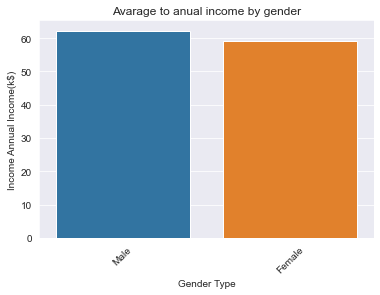

In [17]:
sns.barplot(x = 'Gender Type' , y = 'Income Annual Income(k$)' , data = df_income_gender)
plt.xticks(rotation = 45)
plt.xlabel('Gender Type')
plt.ylabel('Income Annual Income(k$)')
plt.title('Avarage to anual income by gender')
plt.show()


### Avarage to spending score by gender.

In [18]:
# calculate the anual income mean by gender 
male_spending_score = data['Spending Score (1-100)'][data['Gender'] == 1].mean()
female_spending_score = data['Spending Score (1-100)'][data['Gender'] == 0].mean()

spending_score_avarage = [male_spending_score  , female_spending_score]
gender_type = ['Male' , 'Female']

# creating dataframe for avarage income by gender 
df_spending_score_gender = pd.DataFrame({'Gender Type': gender_type , 'Spending Score Average': spending_score_avarage})
df_spending_score_gender

,Gender Type,Spending Score Average
0,Male,48.511364
1,Female,51.526786


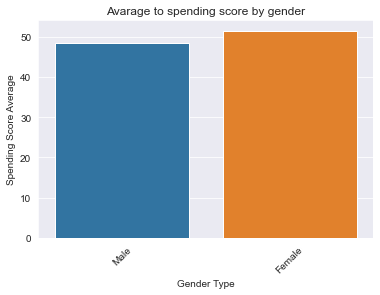

In [19]:
sns.barplot(x = 'Gender Type' , y = 'Spending Score Average' , data = df_spending_score_gender)
plt.xticks(rotation = 45)
plt.xlabel('Gender Type')
plt.ylabel('Spending Score Average')
plt.title('Avarage to spending score by gender')
plt.show()

* I'm not surprised these result for female. :)

### Relation with age and spending score.

#### General

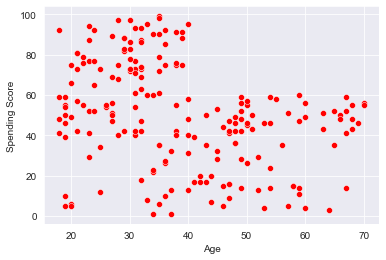

In [22]:
sns.scatterplot(x = 'Age' , y = 'Spending Score (1-100)' , data = data , color = 'red')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

#### By Gender

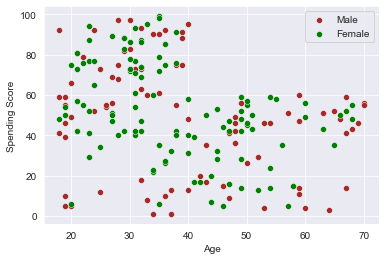

In [24]:
sns.scatterplot(x = 'Age' , y = 'Spending Score (1-100)' , data = data[data['Gender'] == 1] ,label = 'Male', color = 'brown')
sns.scatterplot(x = 'Age' , y = 'Spending Score (1-100)' , data = data[data['Gender'] == 0] ,label = 'Female', color = 'green')
plt.legend(loc = 'best')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

* As we can see our threshold age is approximate 40 for spending score for two gender.  

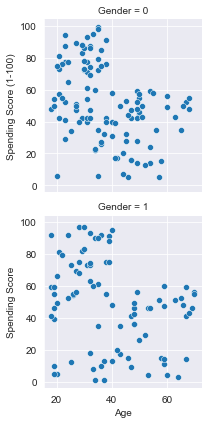

In [27]:
# with facetgrid same processes
g = sns.FacetGrid(data , row = 'Gender')
g.map(sns.scatterplot , 'Age' , 'Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()
# male = 1 , female = 0 we encoded the feature with labelencoder 

### Relation with age and Anual incomes

#### General

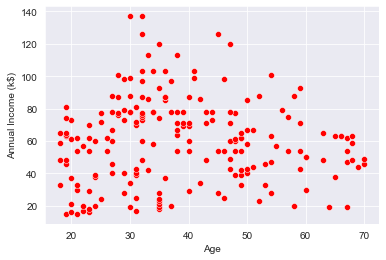

In [28]:
sns.scatterplot(x = 'Age' , y = 'Annual Income (k$)' , data = data , color = 'red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

#### By Gender 

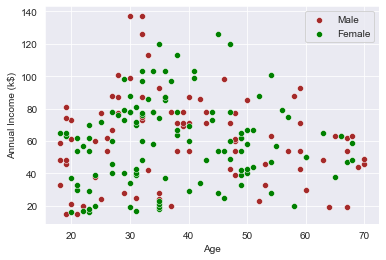

In [29]:
sns.scatterplot(x = 'Age' , y = 'Annual Income (k$)' , data = data[data['Gender'] == 1] ,label = 'Male', color = 'brown')
sns.scatterplot(x = 'Age' , y = 'Annual Income (k$)' , data = data[data['Gender'] == 0] ,label = 'Female', color = 'green')
plt.legend(loc = 'best')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

* As we can see if age approximate between 30-50 people best income.

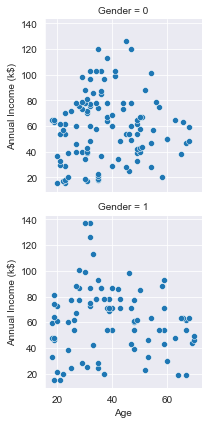

In [30]:
# with facetgrid same processes
g = sns.FacetGrid(data , row = 'Gender')
g.map(sns.scatterplot , 'Age' , 'Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()
# male = 1 , female = 0 we encoded the feature with labelencoder 

### Relation with Anual incomes and Spending score

#### General

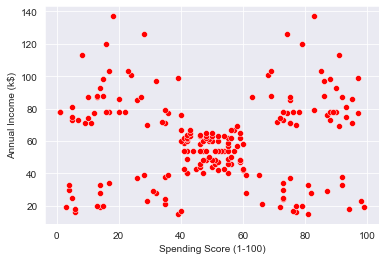

In [32]:
sns.scatterplot(x = 'Spending Score (1-100)' , y = 'Annual Income (k$)' , data = data , color = 'red')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

#### By gender 

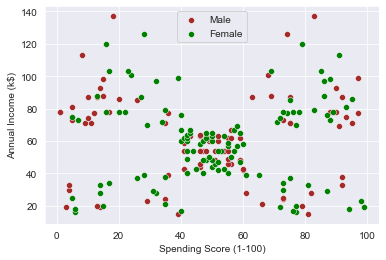

In [33]:
sns.scatterplot(x = 'Spending Score (1-100)' , y = 'Annual Income (k$)' , data = data[data['Gender'] == 1] ,label = 'Male', color = 'brown')
sns.scatterplot(x = 'Spending Score (1-100)' , y = 'Annual Income (k$)' , data = data[data['Gender'] == 0] ,label = 'Female', color = 'green')
plt.legend(loc = 'best')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

* As we can see tight 40-60 in spending score and annual incomes for both of gender.

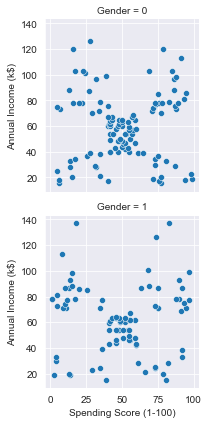

In [34]:
# with facetgrid same processes
g = sns.FacetGrid(data , row = 'Gender')
g.map(sns.scatterplot , 'Spending Score (1-100)' , 'Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()
# male = 1 , female = 0 we encoded the feature with labelencoder 

### Dropping to 3 feature for clustering and visualization

* We will use for clustering processes Annual Incomes and Spending score because the best distribution in these features

In [39]:
X = data.iloc[:,[3,4]]

In [40]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [45]:
from sklearn.cluster import KMeans

# we need to wcss values when we are finding elbow spot
wcss = []

for i in range(1,15):
    kmean = KMeans(n_clusters = i , random_state = 42)
    kmean.fit(X)
    wcss.append(kmean.inertia_)    

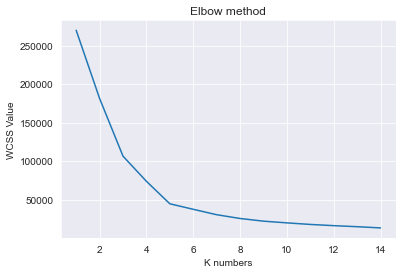

In [48]:
# finding elbow spot from plot

plt.plot(range(1,15) , wcss)
plt.xlabel('K numbers')
plt.ylabel('WCSS Value')
plt.title('Elbow method')
plt.show()

* As we can see our elbow spot is 5

### Clustering with kmeans algorithms

In [50]:
kmeans2 = KMeans(n_clusters = 5 , random_state = 42)
clusters = kmeans2.fit_predict(X)

In [51]:
# create a cluster feature for data 
X['Clusters'] = clusters

In [53]:
X['Clusters'].value_counts()

1    81
2    39
4    35
3    23
0    22
Name: Clusters, dtype: int64

* As we can see we have a 5 cluster after the kmeans algorithms

### Visualization Clusters and centroids.

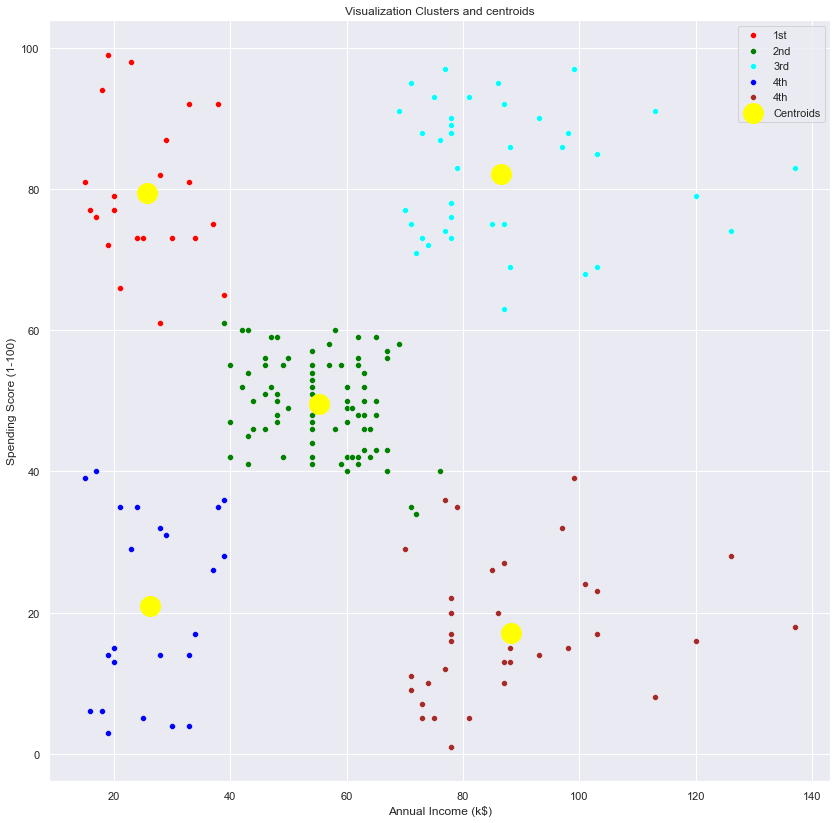

In [62]:
sns.set(rc={'figure.figsize':(14,14)})
sns.scatterplot(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = X[X['Clusters'] == 0] , label = '1st' , color = 'red')
sns.scatterplot(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = X[X['Clusters'] == 1] , label = '2nd' , color = 'green')
sns.scatterplot(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = X[X['Clusters'] == 2] , label = '3rd' , color = 'cyan')
sns.scatterplot(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = X[X['Clusters'] == 3] , label = '4th' , color = 'blue')
sns.scatterplot(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = X[X['Clusters'] == 4] , label = '4th' , color = 'brown')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], color = 'yellow', s = 400 , label = 'Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Visualization Clusters and centroids')
plt.legend(loc = 'best')
plt.show()

* Red - > Annual Income high spending score less
* Blue - > Anuual Income less spending score less
* Green - > Annual Income and spending score are balanced 
* Brown - > Annual Income high spending score less
* Cyan - > Annual income and spending score high